In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import metrics
import cv2 
import numpy as np

X, y = load_iris(return_X_y=True, as_frame=True)
x = X.loc[:,['petal length (cm)', 'petal width (cm)']]


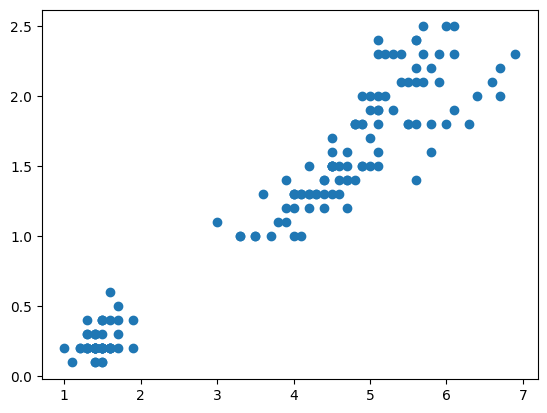

In [26]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'],X['petal width (cm)'])
plt.show()

In [27]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(x)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

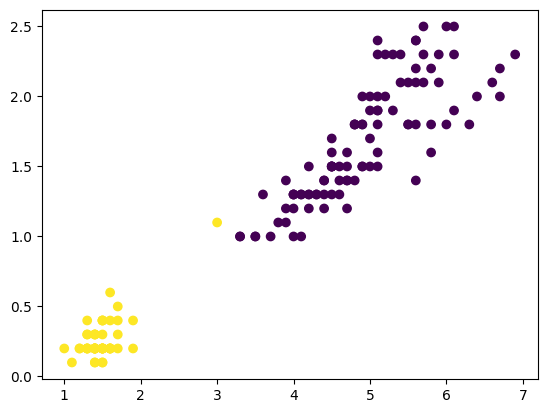

In [28]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
plt.show()

In [29]:
valores_k = []
inercia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(X)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)
    print(kmeans.inertia_)

681.3706
152.34795176035792
78.8556658259773
57.350880212954756
52.99335416666668
43.552222435897434
38.464370844672565
33.500420995671
28.014058733790996
29.387984218653727
25.301477125815367
23.292049670745495
24.91953498329157
20.101641290726818


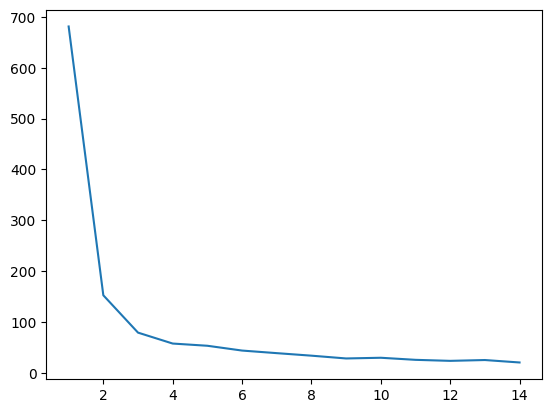

In [30]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercia)

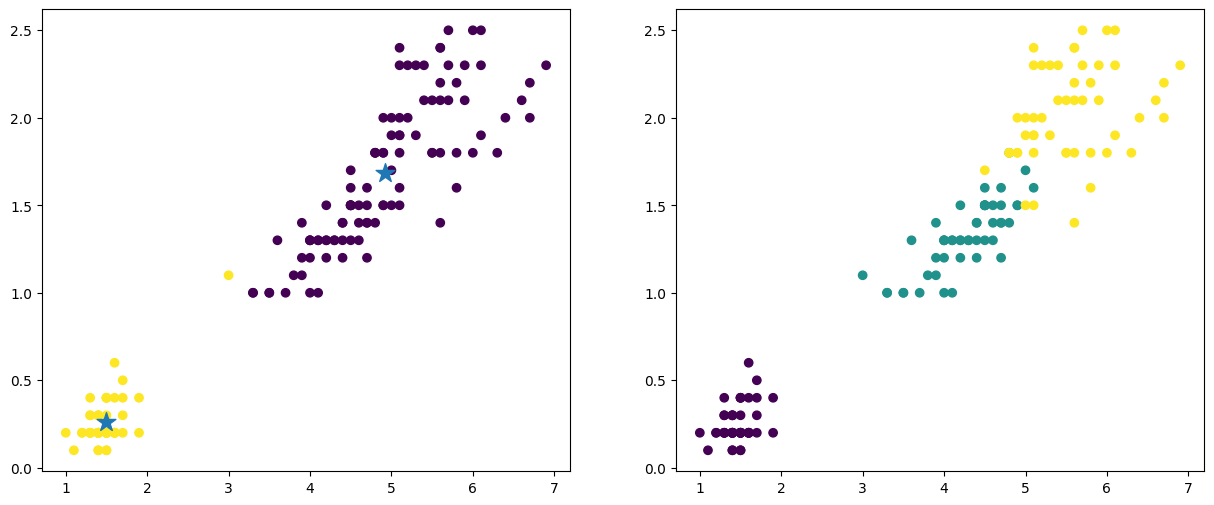

In [31]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(x)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="*", s=200)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)

In [32]:
valores_k = []
ARI = []
RI = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(x)
    valores_k.append(i)
    RI.append(metrics.rand_score(y,kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_))

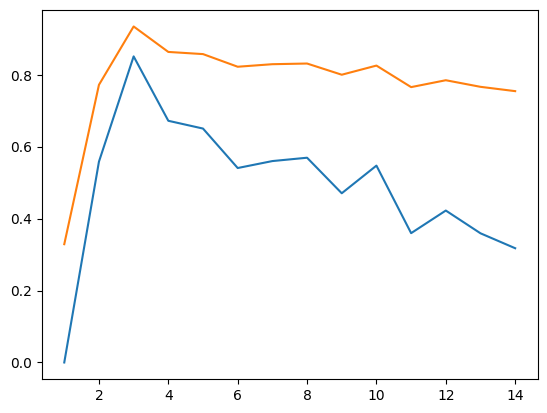

In [33]:
fig, ax = plt.subplots()
ax.plot(valores_k, ARI)
ax.plot(valores_k, RI)


In [34]:
valores_k = []
S = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,n_init='auto').fit(x)
    valores_k.append(i)
    S.append(metrics.silhouette_score(x,kmeans.labels_))

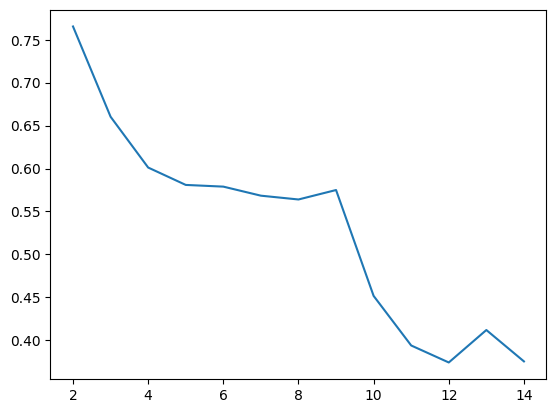

In [35]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [36]:
img = cv2.imread("./campos_floridos.jpg")
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [37]:
pixel_vals = img.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

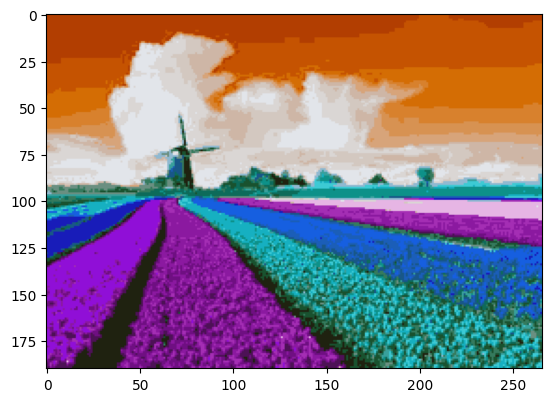

In [39]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.90)
k = 30
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria ,10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((img.shape))
plt.imshow(segmented_image)